In [93]:
import OleFileIO_PL
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from matplotlib.pyplot import figure


In [86]:
def read_excel(file):

    # open the xls file
    read_xls = open(file,'rb')
    ole_f = OleFileIO_PL.OleFileIO(read_xls)
    d = ole_f.openstream('Workbook')
    
    # read this file with pandas
    df = pd.read_excel(d,engine='xlrd')

    return df


def create_month_year(df):        
    
    # create values_month 
    months_to_replace = {}
    value_month = 1
    for month_name in df.month.unique():
        months_to_replace[month_name] = value_month
        value_month+=1 

    # Replacing month name to month value
    df['month'] = df['month'].map(months_to_replace)

    # Creating month_year column
    df['month_year'] = df['year'].astype('str')+'-'+df['month'].astype('str')
    df['month_year'] = pd.to_datetime(df['month_year'])
    
    return df 

In [ ]:
def create_analytical_columns(df):
    df['accumulated_sum_of_price'] = df['average price'].cumsum()
    df['diff_of_price'] = df['average price'].diff()
    df['moving_average_5m'] = df['average price'].rolling(window = 5).mean()
    df['moving_average_3m'] = df['average price'].rolling(window = 3).mean()
    

In [87]:
file = 'C:/Users/felip/Downloads/CEPEA_20220825204450.xls'
df = read_excel(file)

# Change column names
df.columns = ['year','month','state','lowest average price','average price','highest average price']
df = df.drop([0,1,2]).reset_index(drop=True)

df = create_month_year(df)

In [112]:
def plot_average_price(df, state):
    
    df = df[df['state']==state]

    sns.set_style('darkgrid')
    
    figure(figsize=(20, 15), dpi=100)
    
    plt.title(f'Milk Price In {state}',fontsize=24)
    plt.xlabel('Month/Year',fontsize=24)
    plt.ylabel('Average Price',fontsize=24)

    plt.xticks(fontsize=22, rotation=90)

    df = df.set_index('month_year')
   
    return df['average price'].plot();

In [113]:
df

,year,month,state,lowest average price,average price,highest average price,month_year
0,2005,1,RS,0.409,0.4796,0.5153,2005-01-01
1,2005,1,PR,0.3962,0.4806,0.5269,2005-01-01
2,2005,1,SP,0.4177,0.5109,0.5525,2005-01-01
3,2005,1,MG,0.4299,0.4939,0.541,2005-01-01
4,2005,1,GO,0.4093,0.4862,0.5234,2005-01-01
...,...,...,...,...,...,...,...
2284,2022,7,GO,2.8176,3.3575,3.4925,2022-07-01
2285,2022,7,BA,2.4876,2.6878,3.1072,2022-07-01
2286,2022,7,BRASIL,2.8361,3.1932,3.3728,2022-07-01
2287,2022,7,ES,2.5609,2.6239,0,2022-07-01


<AxesSubplot:title={'center':'Milk Price In BRASIL'}, xlabel='month_year', ylabel='Average Price'>

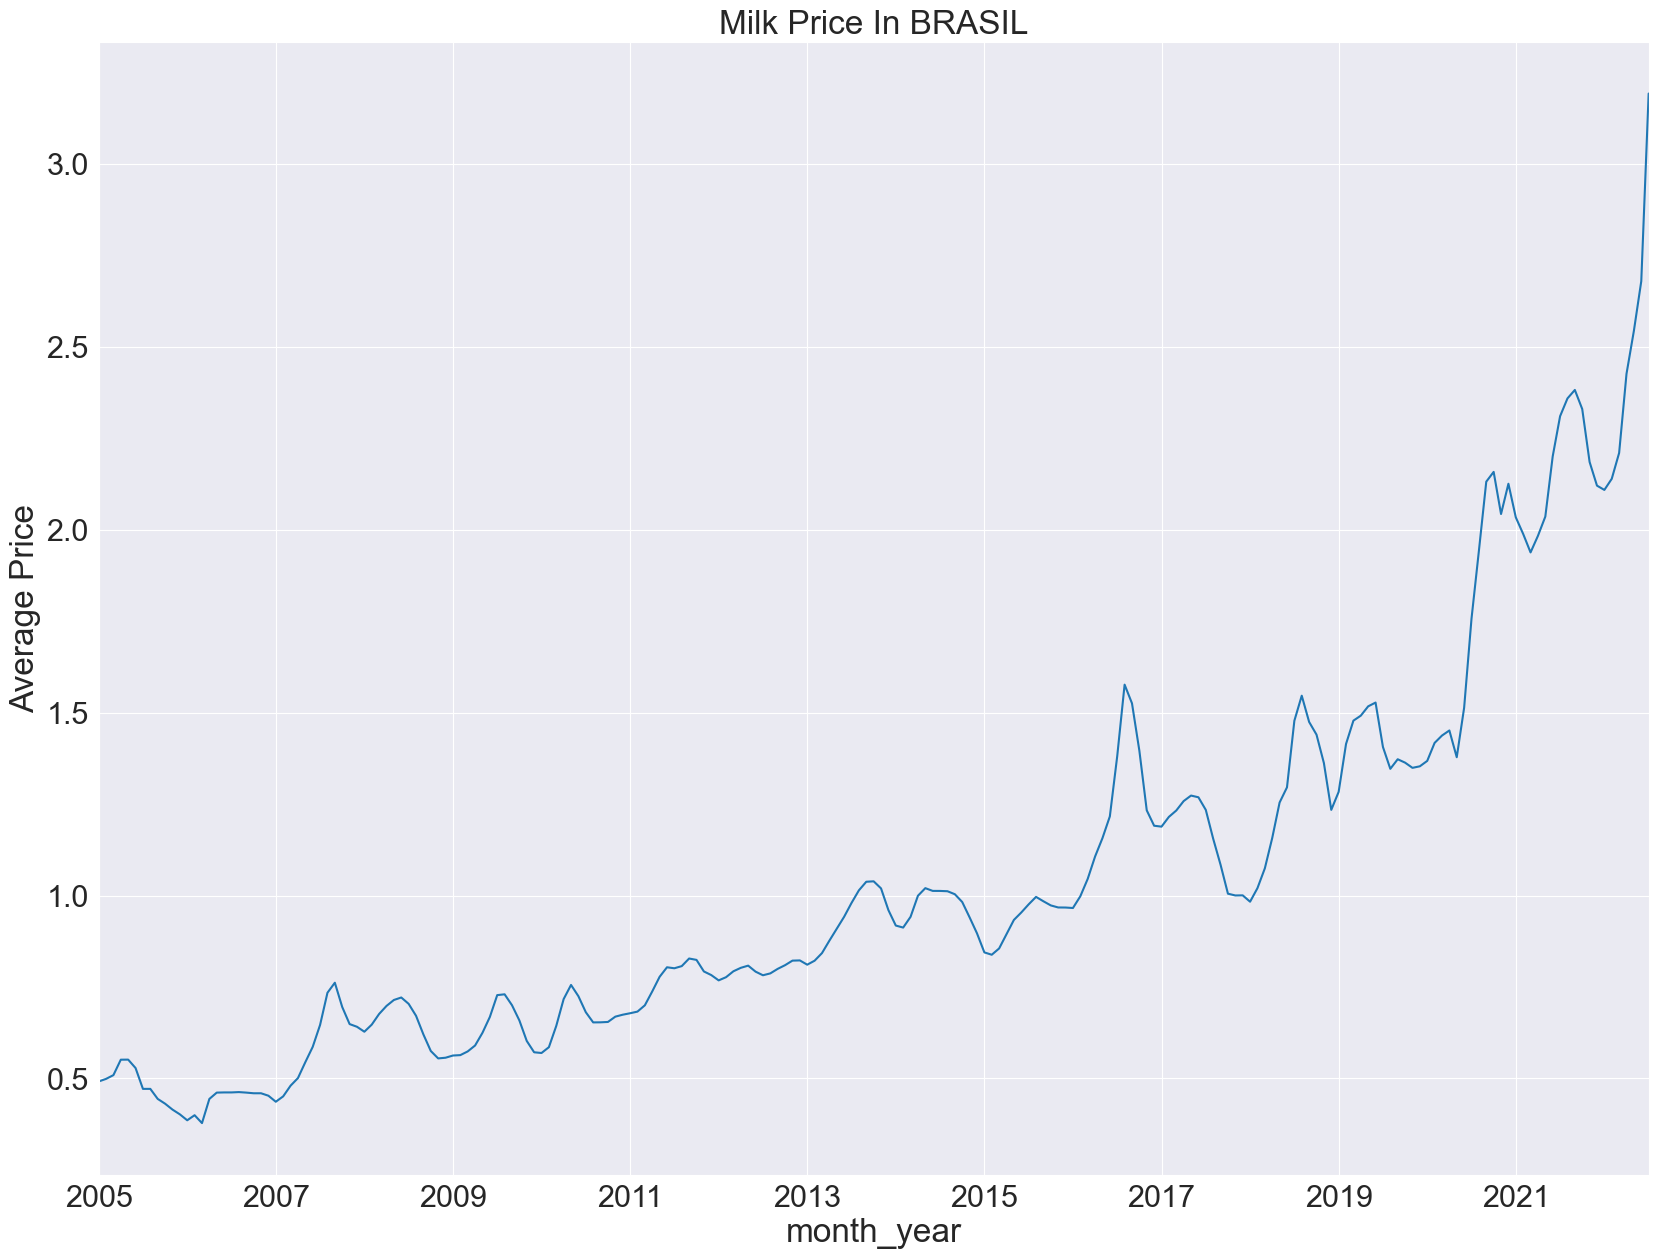

In [116]:
plot_average_price(df,'BRASIL')

In [111]:
def plot_average_price(df,state):
    df = df[df['state']==state]
    

In [73]:
df

,year,month,state,lowest average price,average price,highest average price,month_year
0,2005,JAN,RS,0.409,0.4796,0.5153,JAN-2005
1,2005,JAN,PR,0.3962,0.4806,0.5269,JAN-2005
2,2005,JAN,SP,0.4177,0.5109,0.5525,JAN-2005
3,2005,JAN,MG,0.4299,0.4939,0.541,JAN-2005
4,2005,JAN,GO,0.4093,0.4862,0.5234,JAN-2005
...,...,...,...,...,...,...,...
2284,2022,JUL,GO,2.8176,3.3575,3.4925,JUL-2022
2285,2022,JUL,BA,2.4876,2.6878,3.1072,JUL-2022
2286,2022,JUL,BRASIL,2.8361,3.1932,3.3728,JUL-2022
2287,2022,JUL,ES,2.5609,2.6239,0,JUL-2022


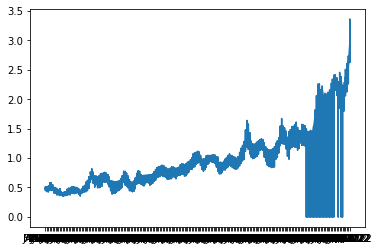

In [70]:
import matplotlib.pyplot as plt 

plt.plot(df['mes_ano'],df['preco medio'])